## Introduction

This notebook uses the Python programming language to implement a one-dimensional cellular automata. 

#### the main idea

This is a one-dimensional cellular automata: Think of it as a row of cells. Maybe 1000 of them for example. 

(Notice in the code below it says 'ncells = 1000'.)

In a row of cells we say a particular cell is at position $i$. The cell to the left is at $i-1$. The cell to the right is at $i+1$. These three cells in a row are then L M R for Left Middle Right.

Below we give a rule (where it says 'Here is the rule!') The rule looks at cells L, M, and R and gives a new result at cell $i$ (which is the middle cell M) for the next time step. This rule is applied across the entire row of cells at once; so no changes are made until everything is determined. 

Notice at cell $0$ and cell $ncells-1$ (when they are the middle cell) there is one cell missing. We imagine that 
the cells loop around into a ring, however, so the L cell for $i=0$ is cell $ncells-1$ (at the far right) and
the R cell for cell $ncells-1$ is cell $0$.

You can change the rule by changing the sequence of ones and zeros in the parentheses. Then run the CA and see what your rule produces.


Rules you may find interesting: 30, 90, 110, 184. Be sure to try rules with both a single seed and with a random pattern
as the seed: You set the randomPattern variable to either True or False.

Populating the interactive namespace from numpy and matplotlib
52137
[1869627, 26099, 52137, 0, 26099, 26038, 0, 0]
[0, 1, 0, 1, 1, 0, 1, 0]


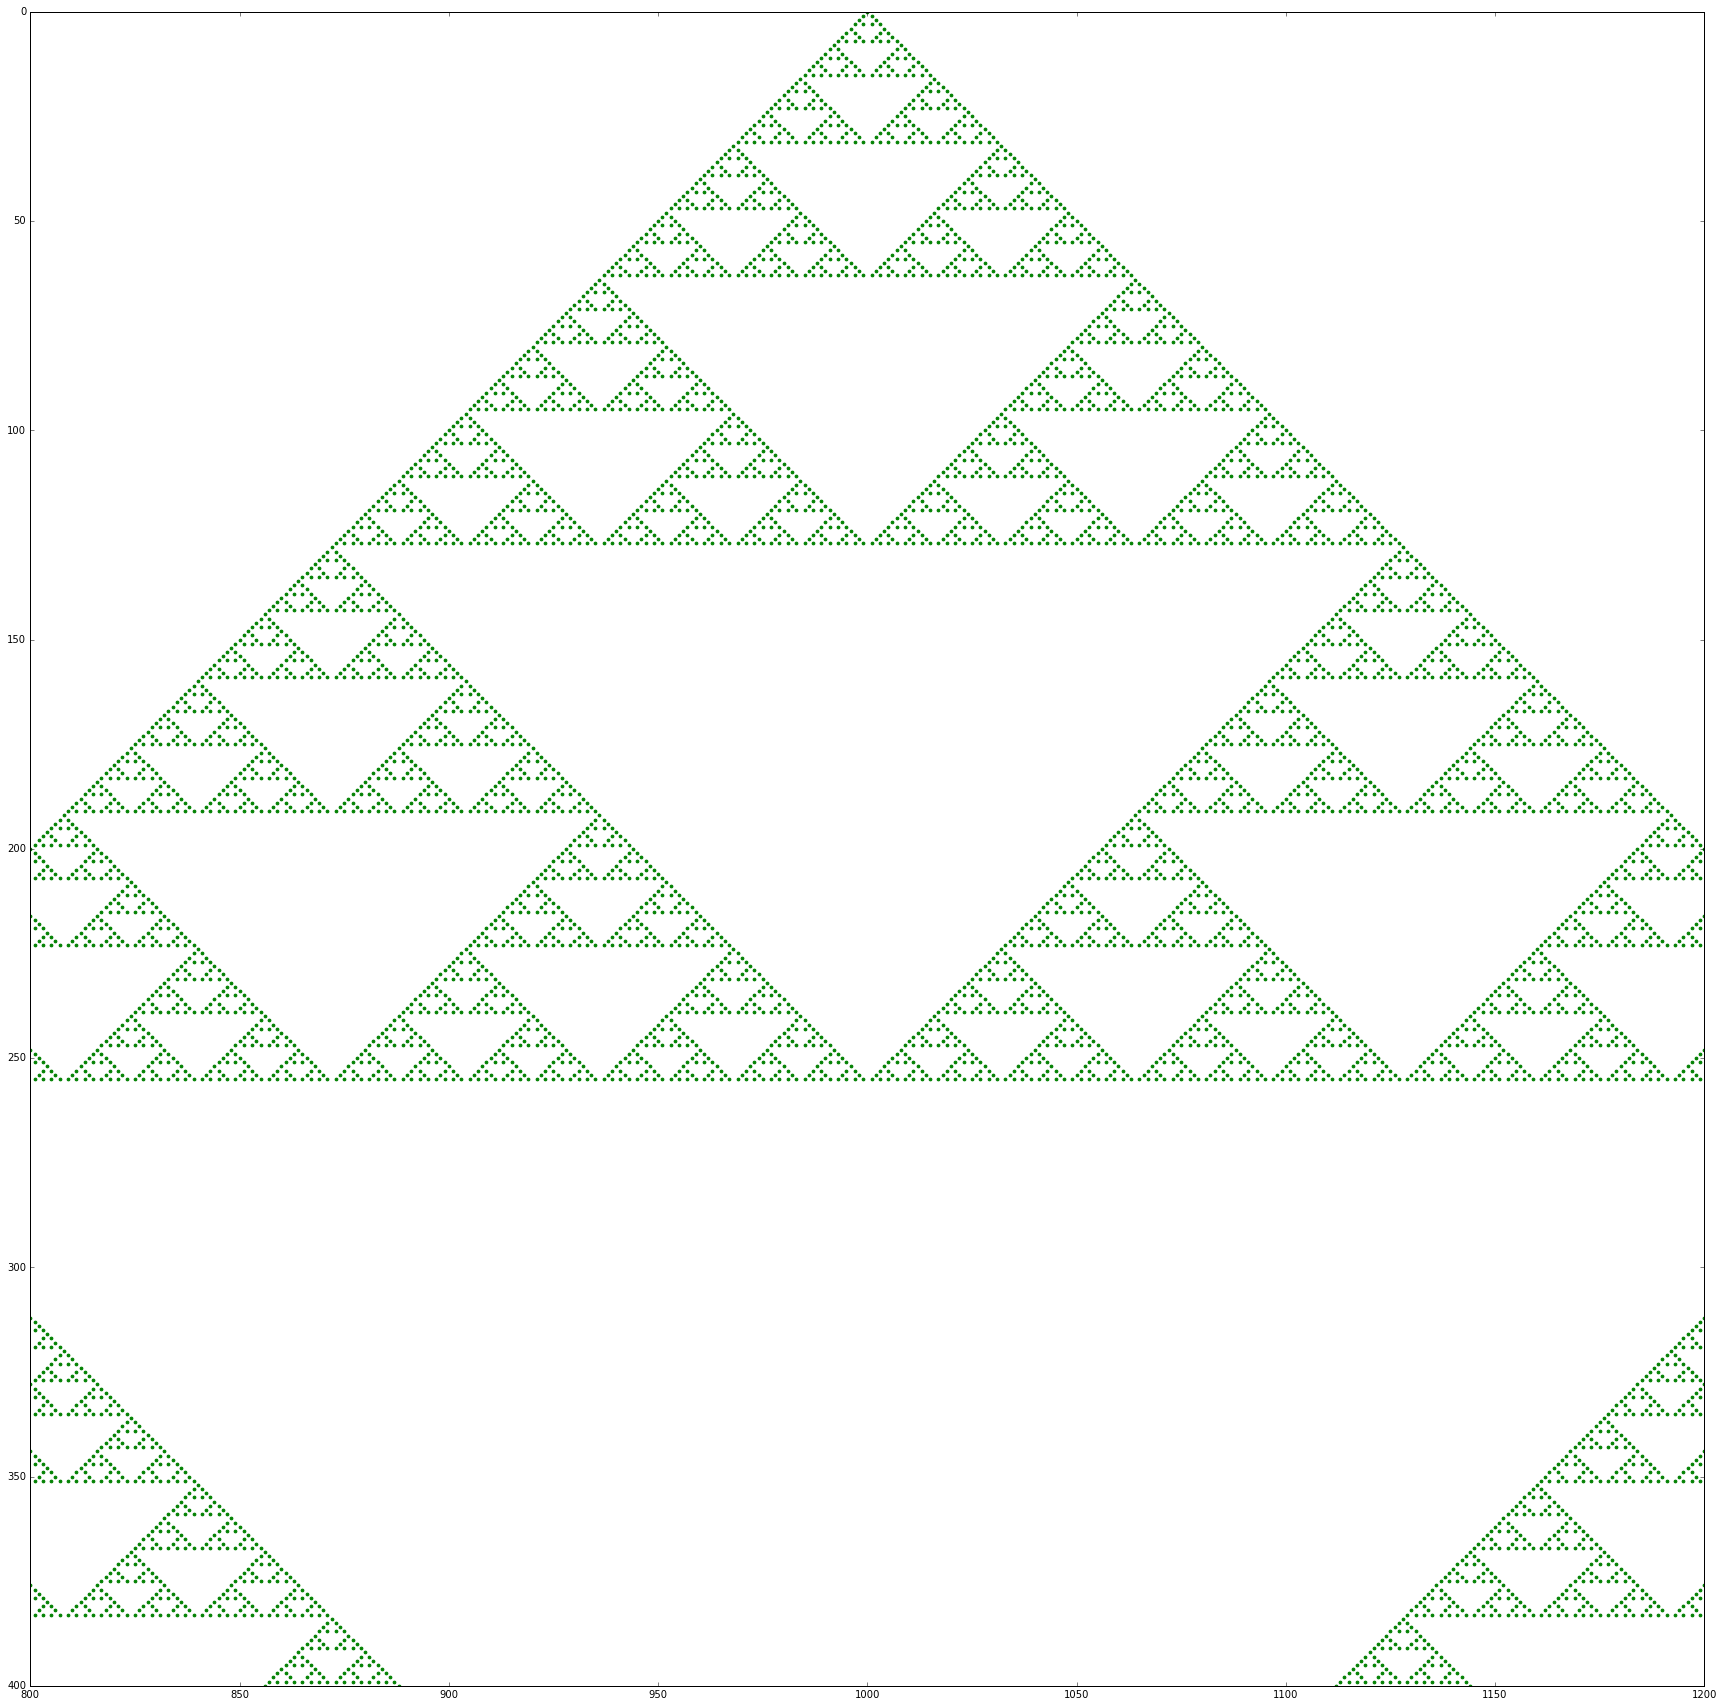

In [6]:
import numpy as np
import random as r

%pylab inline

ncells = 2000
ngens = 1000

rule = []

# Here is the rule!
# The result based on...
#           v       L M R
rule.append(0)    # 0 0 0
rule.append(1)    # 0 0 1
rule.append(1)    # 0 1 0
rule.append(0)    # 0 1 1
rule.append(0)    # 1 0 0
rule.append(1)    # 1 0 1
rule.append(1)    # 1 1 0
rule.append(0)    # 1 1 1

def RuleFromInteger(i):
    global rule
    rule[7] = i/128
    i -= rule[7]*128
    rule[6] = i/64
    i -= rule[6]*64
    rule[5] = i/32
    i -= rule[5]*32
    rule[4] = i/16
    i -= rule[4]*16
    rule[3] = i/8
    i -= rule[3]*8
    rule[2] = i/4
    i -= rule[2]*4
    rule[1] = i/2
    i -= rule[1]*2
    rule[0] = i

RuleFromInteger(90)
# RuleFromInteger(184) # Suggest: randomPattern = True
# RuleFromInteger(110)
# RuleFromInteger(90)

ca0 = [0]*ncells
ca1 = [0]*ncells

randomPattern = False

if randomPattern:
    for i in range(ncells):
        ca0[i] = r.randint(0,1)
else:
    ca0[ncells/2] = 1

x=[]
y=[]

count = [0, 0, 0, 0, 0, 0, 0, 0]

for time in range(ngens):
    for space in range(ncells):
        if ca0[space] == 1: 
            x.append(space)
            y.append(time)
        if space == 0:
            ruleIndex = ca0[ncells - 1]*4 + ca0[0]*2 + ca0[1]
        elif space == ncells - 1:
            ruleIndex = ca0[ncells - 2]*4 + ca0[ncells - 1]*2 + ca0[0]
        else:
            ruleIndex = ca0[space-1]*4 + ca0[space]*2 + ca0[space+1]
        ca1[space] = rule[ruleIndex]
        count[ruleIndex] += 1
    for space in range(ncells):
        ca0[space] = ca1[space]

print len(x)
print count
print rule

figdim = 30
plt.figure(figsize=(figdim, figdim))

# zooming in and out on scatter plots is a bit of a 'regular Python' matplotlib thing.
# zooming here in a Jupyter notebook is a bit trickier
# a high density plot has dimensions 600 x 600 or so and the marker specs work fine like this:
# but to zoom in (say to 200 x 200) we need to modify the s value and possibly the marker string
# This page has marker symbols: http://matplotlib.org/api/markers_api.html
# The boolean 'fullplot' chooses which of these two options are used.
fullplot = True
if fullplot:
    plt.scatter(x,y,s=30, marker='.',color='g')
    plt.xlim([800., 1200.])
    plt.ylim([0., 400.])
else:
    plt.scatter(x,y,s=49, marker='s',color='g')
    plt.xlim([1400., 1600.])
    plt.ylim([800., 1000.])

# by flipping the y axis we have time increasing from top to bottom
plt.gca().invert_yaxis()